In [157]:
from matplotlib import pyplot as plt
import numpy as np
from aeon.utils.plotting import plot_series
from aeon.datasets import load_airline
from aeon.forecasting.naive import NaiveForecaster
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.base import ForecastingHorizon
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
from aeon.forecasting.arima import ARIMA

In [158]:
y = load_airline()

In [159]:
random_data = np.random.random((y.shape[0], 3))
cols = [f'X{i+1}' for i in range(random_data.shape[1])]
X = pd.DataFrame(data=random_data, columns=cols, index=y.index)
X.head()

,X1,X2,X3
Period,,,
1949-01,0.505818,0.572693,0.991974
1949-02,0.153529,0.127089,0.096229
1949-03,0.442057,0.444684,0.905956
1949-04,0.879585,0.923187,0.076416
1949-05,0.039811,0.059845,0.692198


In [160]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
X_train, X_test = temporal_train_test_split(X, test_size=36)

In [161]:
print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)

(108,) (36,)
(108, 3) (36, 3)


In [162]:
fh = np.arange(1, 37)
forecaster = ARIMA(order=(1, 1, 0), seasonal_order=(0, 1, 0, 12))


In [163]:
forecaster.fit(y_train)
y_pred = forecaster.predict(fh=fh)

In [164]:
forecaster.fit(y_train, X=X_train)
y_pred_ex = forecaster.predict(fh=fh, X=X_test)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

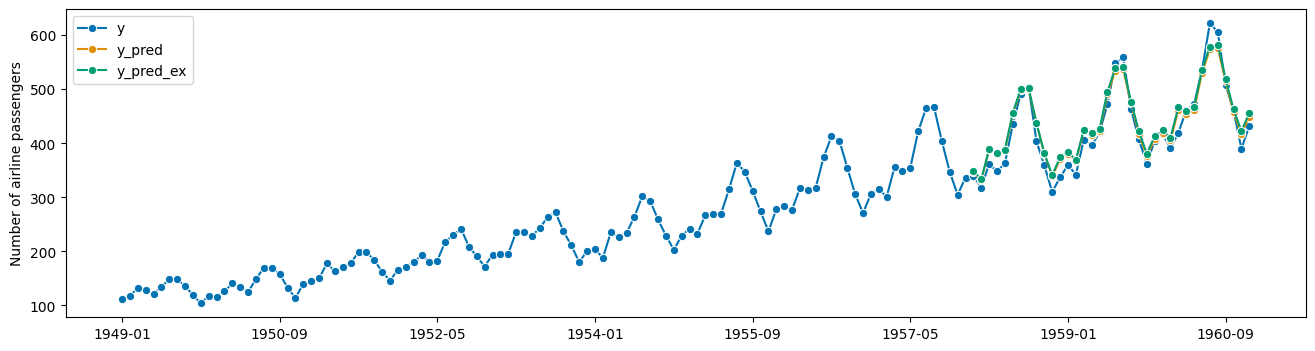

In [165]:
plot_series(y, y_pred, y_pred_ex, labels=['y', 'y_pred', 'y_pred_ex'])

In [ ]:
y, X = load_longley()
fh = ForecastingHorizon([1, 2, 3])
pipe = ForecastX(  
    forecaster_X=VAR(),
    forecaster_y=ARIMA(),
)
pipe = pipe.fit(y, X=X, fh=fh)  
# this now works without X from the future of y!
y_pred = pipe.predict(fh=fh)  